In [2]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
import plotly.express as px

# Dependencies for GDP data
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
# File to Load for Olympic Data
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame for Olympic Data
olympic_raw = pd.read_csv(olympic_csv)
pd.options.display.float_format = '{:.2f}'.format
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Load and read .xls file for GDP data
gdp_data = pd.read_excel("Country GDP Final.xls")

In [5]:
# Review and format GDP numbers

#pd.options.display.float_format = '${:,.2f}'.format
gdp_data.head()

,NOC,NOC Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AFG,Afghanistan,nan,nan,4055176933.37,4515563413.83,5226775163.30,6209140044.01,6971286731.72,9747886104.53,...,12439087076.77,15856574731.44,17804280538.11,20001615788.67,20561054090.40,20484873230.21,19907111418.99,19362642266.65,20191764940.16,19362969582.36
1,ALB,Albania,3480355188.60,3922099470.97,4348070165.19,5611492282.87,7184681398.57,8052075642.11,8896073938.31,10677321490.38,...,12044223457.83,11926962834.96,12890867535.56,12319784701.33,12776277648.92,13228244336.32,11386927679.09,11861353752.07,13025064966.58,15102500898.24
2,ALG,Algeria,54786074940.21,54743249368.65,56758113501.17,67866141223.59,85324767230.49,103198442061.08,117030941571.94,134978727825.85,...,137214821177.36,161205065469.31,200015355528.47,209062886917.04,209754763860.68,213808808746.70,165978425168.39,160032930353.76,167390266100.76,173757952824.25
3,AND,Andorra,1434429703.34,1496912751.68,1733116883.12,2398645598.19,2935659299.73,3255789080.96,3543256805.92,4016972351.49,...,3660530702.97,3355695364.24,3442062830.14,3164615186.95,3281585236.33,3350736367.25,2811489408.89,2877311946.90,3013387423.94,3236543909.35
4,ANG,Angola,9129594818.61,8936063723.20,15285594828.42,17812705294.33,23552052407.55,36970918699.25,52381006892.04,65266452081.39,...,70307163678.24,83799496611.20,111789686464.44,128052853643.11,136709862831.19,145712200312.51,116193649124.15,101123851090.46,122123822333.59,105750987618.63


In [17]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
#olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games
# this is our dataframe for summer olympic data, post WW2.
# summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
# summer_olympics.head()
# this is our dataframe for winter olympic data, post WW2.
winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]
winter_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.00,185.00,82.00,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


The correlation coefficient (rvalue) between 2014 GDP and total medal count is: 0.407169
The coefficient of determination (r-squared) value is: 0.165787


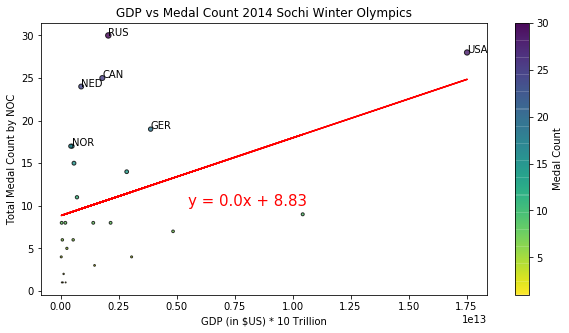

In [37]:
# GDP and medal count analysis on 2014 Olympics
olympics_2014 = winter_olympics.loc[winter_olympics.Year == 2014]

# # Drop rows where Medal is NaN
no_null_olympics_2014 = olympics_2014.dropna(how='any')

# Dropping duplicate medals for team events
final_result = no_null_olympics_2014.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2014 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2014 = medal_count_by_NOC_2014.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2014 GDP data
gdp_NOC_2014 = gdp_data.loc[: , ["NOC", "2014"]]

# # Merge the medal count by NOC and GDP dataframes
merge_2014 = pd.merge(final_medal_count_by_NOC_2014, gdp_NOC_2014, on="NOC", how="left")
merge_2014["Reformatted"] = (merge_2014["2014"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2014 = merge_2014.dropna(how="any")

# Scatter plot of medal count and gdp for 2014 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2014["Medal_Count"]
gdp = clean_merge_2014["2014"]

# Create regression line and calculate rvalue and r_squared
x_values = gdp
y_values = medal_count
noc_types = clean_merge_2014["NOC"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)

# # Create scatterplot, colormap
c = clean_merge_2014["Medal_Count"]
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count,
            c=c, cmap = 'viridis_r', alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5500000000000, 10), fontsize=15, color="red")
cbar = plt.colorbar()
cbar.set_label('Medal Count')
plt.title("GDP vs Medal Count 2014 Sochi Winter Olympics")
plt.xlabel("GDP (in $US) * 10 Trillion")
plt.ylabel("Total Medal Count by NOC")

# Add labels to top medal count winners
plt.text(2059984158438.46, 30,"RUS")
plt.text(17521746534000.00,28, "USA")
plt.text(1801480123070.82,25, "CAN")
plt.text(890981311077.66,24, "NED")
plt.text(3883920155292.26,19,"GER")
plt.text(498410050251.26,17, "NOR")

# # Save to png file
# plt.savefig("Resources/GDP_vs_MedalCount_2014_Sochi_Winter_Olympics.png")

print(f"The correlation coefficient (rvalue) between 2014 GDP and total medal count is: {round(rvalue, 6)}")
print(f"The coefficient of determination (r-squared) value is: {round(r_squared, 6)}")


The correlation coefficient (rvalue) between 2010 GDP and total medal count is: 0.598557
The coefficient of determination (r-squared) value is: 0.358271


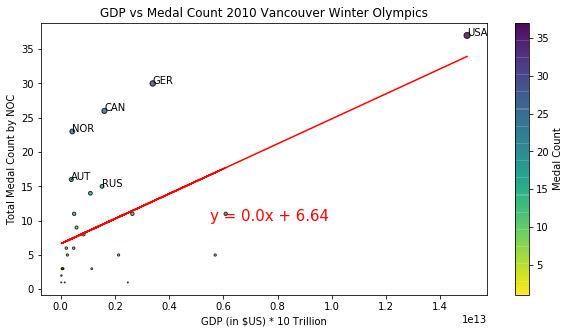

In [54]:
# GDP and medal count analysis on 2010 Olympics
olympics_2010 = winter_olympics.loc[winter_olympics.Year == 2010]

# Drop rows where Medal is NaN
no_null_olympics_2010 = olympics_2010.dropna(how='any')

# Dropping duplicate medals for team events
final_result = no_null_olympics_2010.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2010 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2010 = medal_count_by_NOC_2010.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2010 GDP data
gdp_NOC_2010 = gdp_data.loc[: , ["NOC", "2010"]]

# Merge the medal count by NOC and GDP dataframes
merge_2010 = pd.merge(final_medal_count_by_NOC_2010, gdp_NOC_2010, on="NOC", how="left")
merge_2010["Reformatted"] = (merge_2010["2010"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2010 = merge_2010.dropna(how="any")

# Scatter plot of medal count and gdp for 2010 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2010["Medal_Count"]
gdp = clean_merge_2010["2010"]

# Create regression line and calculate rvalue and r_squared
x_values = gdp
y_values = medal_count
noc_types = clean_merge_2010["NOC"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)

# Create scatterplot, colormap
c = clean_merge_2010["Medal_Count"]
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count,
            c=c, cmap = 'viridis_r', alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5500000000000, 10), fontsize=15, color="red")
cbar = plt.colorbar()
cbar.set_label('Medal Count')
plt.title("GDP vs Medal Count 2010 Vancouver Winter Olympics")
plt.xlabel("GDP (in $US) * 10 Trillion")
plt.ylabel("Total Medal Count by NOC")

# Add labels to top medal count winners
plt.text(14992052727000.00, 37, "USA")
plt.text(3396354075663.73, 30, "GER")
plt.text(1613542812589.39, 26, "CAN")
plt.text(428757038466.84, 23, "NOR")
plt.text(391892746544.69, 16, "AUT")
plt.text(1524917468442.01, 15, "RUS")

# # Save to png file
# # plt.savefig("Resources/GDP_vs_MedalCount_2010_Vancouver_Winter_Olympics.png")

print(f"The correlation coefficient (rvalue) between 2010 GDP and total medal count is: {round(rvalue, 6)}")
print(f"The coefficient of determination (r-squared) value is: {round(r_squared, 6)}")


The correlation coefficient (rvalue) between 2006 GDP and total medal count is: 0.386833
The coefficient of determination (r-squared) value is: 0.14964


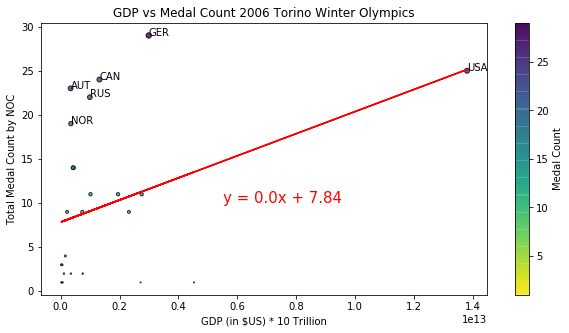

In [70]:
# GDP and medal count analysis on 2006 Olympics
olympics_2006 = winter_olympics.loc[winter_olympics.Year == 2006]

# Drop rows where Medal is NaN
no_null_olympics_2006 = olympics_2006.dropna(how='any')

# Dropping duplicate medals for team events
final_result = no_null_olympics_2006.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2006 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2006 = medal_count_by_NOC_2006.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2006 GDP data
gdp_NOC_2006 = gdp_data.loc[: , ["NOC", "2006"]]

# Merge the medal count by NOC and GDP dataframes
merge_2006 = pd.merge(final_medal_count_by_NOC_2006, gdp_NOC_2006, on="NOC", how="left")
merge_2006["Reformatted"] = (merge_2006["2006"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2006 = merge_2006.dropna(how="any")

# Scatter plot of medal count and gdp for 2006 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2006["Medal_Count"]
gdp = clean_merge_2006["2006"]

# Create regression line and calculate rvalue and r_squared
x_values = gdp
y_values = medal_count
noc_types = clean_merge_2006["NOC"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)

# Create scatterplot, colormap
c = clean_merge_2006["Medal_Count"]
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count,
            c=c, cmap = 'viridis_r', alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5500000000000, 10), fontsize=15, color="red")
cbar = plt.colorbar()
cbar.set_label('Medal Count')
plt.title("GDP vs Medal Count 2006 Torino Winter Olympics")
plt.xlabel("GDP (in $US) * 10 Trillion")
plt.ylabel("Total Medal Count by NOC")

# Add labels to top medal count winners
plt.text(2992196713084.93,29, "GER")
plt.text(13814611414000.00,25, "USA")
plt.text(1315415197461.21,24, "CAN")
plt.text(335998557270.10,23, "AUT")
plt.text(989930542278.70,22,"RUS")
plt.text(345581369965.54,19, "NOR")

# # Save to png file
# # plt.savefig("Resources/GDP_vs_MedalCount_2006_Torino_Winter_Olympics.png")

print(f"The correlation coefficient (rvalue) between 2006 GDP and total medal count is: {round(rvalue, 6)}")
print(f"The coefficient of determination (r-squared) value is: {round(r_squared, 6)}")

The correlation coefficient (rvalue) between 2002 GDP and total medal count is: 0.523263
The coefficient of determination (r-squared) value is: 0.273804


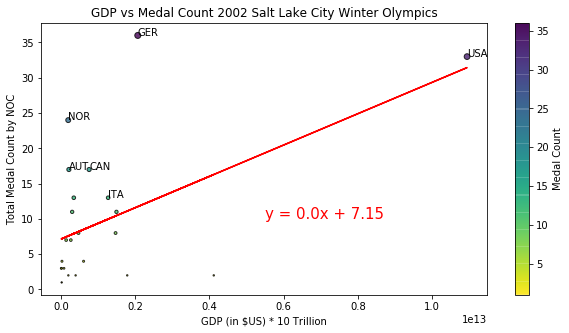

In [90]:
# GDP and medal count analysis on 2002 Olympics
olympics_2002 = winter_olympics.loc[winter_olympics.Year == 2002]

# Drop rows where Medal is NaN
no_null_olympics_2002 = olympics_2002.dropna(how='any')

# Dropping duplicate medals for team events
final_result = no_null_olympics_2002.drop_duplicates(subset=['Event', 'NOC', 'Medal'])

# Grouping by NOC countries and calculating total medals won by country
medal_count_by_NOC_2002 = final_result.NOC.value_counts().to_frame(name = "Medal_Count").reset_index()
final_medal_count_by_NOC_2002 = medal_count_by_NOC_2002.rename(columns={"index": "NOC"})

# Creating a dataframe for just 2002 GDP data
gdp_NOC_2002 = gdp_data.loc[: , ["NOC", "2002"]]

# Merge the medal count by NOC and GDP dataframes
merge_2002 = pd.merge(final_medal_count_by_NOC_2002, gdp_NOC_2002, on="NOC", how="left")
merge_2002["Reformatted"] = (merge_2002["2002"]/1000000000).apply(lambda x: "${:,.2f}BB".format(x))
clean_merge_2002 = merge_2002.dropna(how="any")

# Scatter plot of medal count and gdp for 2002 Olympic medal winners to see 
# if there is a correlation between GDP and medal count.  Also adding linear regression
medal_count = clean_merge_2002["Medal_Count"]
gdp = clean_merge_2002["2002"]

# Create regression line and calculate rvalue and r_squared
x_values = gdp
y_values = medal_count
noc_types = clean_merge_2002["NOC"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values , y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = (rvalue**2)

# Create scatterplot, colormap
c = clean_merge_2002["Medal_Count"]
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values,  marker="o", facecolors="blue", edgecolor="black", s=medal_count,
            c=c, cmap = 'viridis_r', alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5500000000000, 10), fontsize=15, color="red")
cbar = plt.colorbar()
cbar.set_label('Medal Count')
plt.title("GDP vs Medal Count 2002 Salt Lake City Winter Olympics")
plt.xlabel("GDP (in $US) * 10 Trillion")
plt.ylabel("Total Medal Count by NOC")

# Add labels to top medal count winners
plt.text(2068624129493.69, 36, "GER")
plt.text(10936419054000.00, 33, "USA")
plt.text(195524186477.62, 24, "NOR")
plt.text(213377771503.86, 17, "AUT")
plt.text(757950678646.53, 17, "CAN")
plt.text(1270712309429.70, 13, "ITA")

# # # Save to png file
# # # plt.savefig("Resources/GDP_vs_MedalCount_2002_SLCity_Winter_Olympics.png")

print(f"The correlation coefficient (rvalue) between 2002 GDP and total medal count is: {round(rvalue, 6)}")
print(f"The coefficient of determination (r-squared) value is: {round(r_squared, 6)}")